In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt

In [12]:
combine_data = pd.read_csv("Data_Bowl_combine.csv")
print(combine_data.head)
combine_data = combine_data.drop_duplicates()


<bound method NDFrame.head of                 Player   Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
0         John Abraham   OLB  76  252   4.55       NaN        NaN        NaN   
1      Shaun Alexander    RB  72  218   4.58       NaN        NaN        NaN   
2       Darnell Alford    OT  76  334   5.56      25.0       23.0       94.0   
3         Kyle Allamon    TE  74  253   4.97      29.0        NaN      104.0   
4     Rashard Anderson    CB  74  206   4.55      34.0        NaN      123.0   
...                ...   ...  ..  ...    ...       ...        ...        ...   
6213      Chris Worley   ILB  74  238   4.86      29.5       15.0        NaN   
6214       Isaiah Wynn     G  75  313    NaN       NaN        NaN        NaN   
6215      Isaac Yiadom    CB  73  190   4.52       NaN        8.0      120.0   
6216       Kenny Young   ILB  73  236   4.60      36.0       23.0      117.0   
6217      Trevon Young  EDGE  76  258   4.78      33.0       25.0      114.0   

      Con

In [3]:
#Attempting to sort by position
a = combine_data.sort_values(by=["Pos"])
print(a.head)


<bound method NDFrame.head of                Player Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
3108   Jonathan Luigs   C  76  301   5.14      31.0       26.0       99.0   
3247   Edwin Williams   C  74  308   5.40      28.5       22.0       99.0   
3253        Eric Wood   C  76  310   5.19      30.5       30.0       99.0   
3301       Jeff Byers   C  75  301   5.04       NaN       33.0        NaN   
1197    Brett Romberg   C  74  295   5.20      27.5       27.0       99.0   
...               ...  ..  ..  ...    ...       ...        ...        ...   
3786    Joseph Morgan  WR  72  189   4.38      35.5       10.0      123.0   
4797    Kevin Norwood  WR  74  198   4.48      33.0        8.0      121.0   
3785   Denarius Moore  WR  72  194   4.43      36.0       13.0      118.0   
1001    Tyrone Calico  WR  76  223   4.34      38.0        NaN      127.0   
1776  Vincent Jackson  WR  77  241   4.46      39.0        NaN        NaN   

      Cone  Shuttle  Year    Pfr_ID    AV    

<AxesSubplot:title={'center':'Forty'}, xlabel='Pos'>

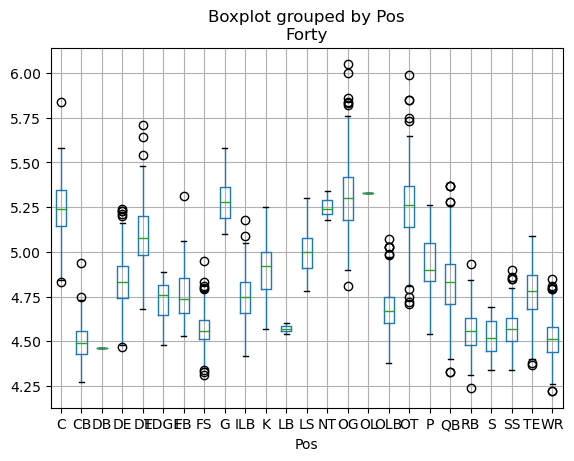

In [4]:
#I would like to plot some features with boxplots after aggregating by position just to compare among positions
combine_data.boxplot(column='Forty', by='Pos')
#It is probably better to combine groups that have similar scores like O-line and Safeties/CBs maybe.
#Probably should remove Kicker and Punter, too.

In [19]:
#Combine positions usually considered roughly equivalent
new = 'C', 'G', 'OG', 'OL'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'IOL')
combine_data['Pos'].nunique()
combine_data.head(20)

new = 'FS', 'SS', 'S', 'DB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DB')
combine_data['Pos'].nunique()


new = 'TE', 'FB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'TE/FB')
combine_data['Pos'].nunique()

new = 'NT'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DT')
combine_data['Pos'].nunique()
combine_data.head(20)

new = 'LB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'ILB')
combine_data['Pos'].nunique()
combine_data.head(20)

new = 'EDGE'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DE')
combine_data['Pos'].nunique()
combine_data.head(20)

#Remove K, P, LS
new = 'K' , 'P' , 'LS'
combine_data = combine_data[~combine_data['Pos'].isin(new)]
combine_data['Pos'].nunique()
combine_data.head(20)


,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE/FB,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0
6,LaVar Arrington,OLB,75,250,4.53,NaN,NaN,NaN,NaN,NaN,2000,ArriLa00,31.0,Washington Redskins,1.0,2.0
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,2000,AtkiCo20,1.0,NaN,NaN,NaN
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,AustRe20,3.0,Chicago Bears,4.0,125.0
11,Mark Baniewicz,OT,78,312,5.34,28.0,20.0,96.0,7.72,4.73,2000,NaN,0.0,NaN,NaN,NaN
12,Rashidi Barnes,DB,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,BarnRa20,1.0,Cleveland Browns,7.0,225.0


In [20]:
combine_data['Pos'].value_counts()

WR       857
CB       630
IOL      552
RB       540
DE       510
DB       471
DT       466
OT       460
TE/FB    454
OLB      424
QB       350
ILB      279
Name: Pos, dtype: int64

In [21]:
combine_data['Pos'].nunique()

12

In [8]:
#Get raw NA proportions for each feature
missing = combine_data.isna().sum()
missing = missing/len(combine_data) * 100
print(missing)

Player        0.000000
Pos           0.000000
Ht            0.000000
Wt            0.000000
Forty         2.052394
Vertical     20.206908
BenchReps    30.118472
BroadJump    20.907726
Cone         33.439012
Shuttle      32.270983
Year          0.000000
Pfr_ID       20.357083
AV            0.000000
Team         38.628400
Round        38.628400
Pick         38.628400
dtype: float64


In [9]:
#Get missing amount after removing UDFAs
no_UDFAs = combine_data[~combine_data['Round'].isna()]
missing_no_UDFAs = no_UDFAs.isna().sum()
missing_no_UDFAs = missing_no_UDFAs/len(no_UDFAs) * 100
print(missing_no_UDFAs)

Player        0.000000
Pos           0.000000
Ht            0.000000
Wt            0.000000
Forty         1.114736
Vertical     20.418706
BenchReps    29.771615
BroadJump    21.179989
Cone         33.143013
Shuttle      32.300163
Year          0.000000
Pfr_ID        2.283850
AV            0.000000
Team          0.000000
Round         0.000000
Pick          0.000000
dtype: float64


In [10]:
#Sort by position
no_UDFAs = no_UDFAs.sort_values(by= 'Pos')
no_UDFAs.head

<bound method NDFrame.head of                 Player Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
4361        Micah Hyde  CB  72  197   4.56      33.0       12.0      121.0   
4488       Darius Slay  CB  72  192   4.36      35.5       14.0      124.0   
4484     Tharold Simon  CB  74  202   4.51      34.0        9.0      128.0   
1306       Greg Brooks  CB  71  177   4.45       NaN        NaN        NaN   
4476        Logan Ryan  CB  71  191   4.56      32.5       14.0      116.0   
...                ...  ..  ..  ...    ...       ...        ...        ...   
4001     Michael Floyd  WR  75  220   4.40      36.5       16.0      122.0   
5202     Darren Waller  WR  78  238   4.46      37.0       12.0      125.0   
1735       Fred Gibson  WR  76  196   4.55      38.5        NaN      126.0   
4037      Stephen Hill  WR  76  215   4.36      39.5       14.0      133.0   
3008  Dominique Edison  WR  74  204   4.42      37.0        NaN      120.0   

      Cone  Shuttle  Year    Pfr_

<AxesSubplot:title={'center':'Forty'}, xlabel='Pos'>

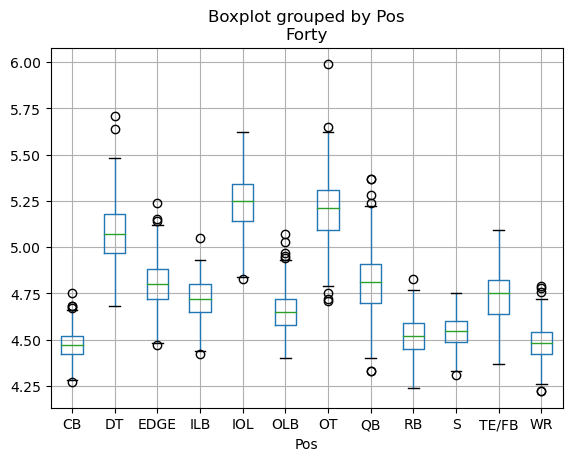

In [18]:
#Now proceed with just the no UDFA dataframe. Displaying 40 time boxplot of cleaned dataframe
no_UDFAs.boxplot(column='Forty', by='Pos')